In [2]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import numpy as py
from matplotlib import pyplot as plt

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
batch_size = 64
base_dir = 'data'

In [5]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Images',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Avulsion fracture','Comminuted fracture','Compression-Crush fracture','Fracture Dislocation',
                  'Greenstick fracture','Hairline Fracture','Impacted fracture','Intra-articular fracture',
                  'Longitudinal fracture','Oblique fracture','Pathological fracture','Spiral Fracture'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 1685 images belonging to 12 classes.


In [7]:
model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
        # The first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a dense layer
        tf.keras.layers.Flatten(),
        # 128 neuron in the fully-connected layer
        tf.keras.layers.Dense(128, activation='relu'),
        # 5 output neurons for 5 classes with the softmax activation
        tf.keras.layers.Dense(12, activation='softmax')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n

n_epochs = 30

In [13]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
26/26 [==============================] - 14s 508ms/step - loss: 2.4391 - acc: 0.1462
Epoch 2/30
26/26 [==============================] - 15s 589ms/step - loss: 2.3924 - acc: 0.1629
Epoch 3/30
26/26 [==============================] - 14s 528ms/step - loss: 2.3242 - acc: 0.1875
Epoch 4/30
26/26 [==============================] - 12s 469ms/step - loss: 2.2212 - acc: 0.2270
Epoch 5/30
26/26 [==============================] - 14s 526ms/step - loss: 2.1120 - acc: 0.2733
Epoch 6/30
26/26 [==============================] - 13s 508ms/step - loss: 1.9552 - acc: 0.3399
Epoch 7/30
26/26 [==============================] - 13s 511ms/step - loss: 1.8081 - acc: 0.3948
Epoch 8/30
26/26 [==============================] - 12s 460ms/step - loss: 1.6682 - acc: 0.4454
Epoch 9/30
26/26 [==============================] - 13s 491ms/step - loss: 1.4715 - acc: 0.5077
Epoch 10/30
26/26 [==============================] - 13s 516ms/step - loss: 1.3260 - acc: 0.5497
Epoch 11/30
26/26 [====================

In [14]:
model.save('model.h5')

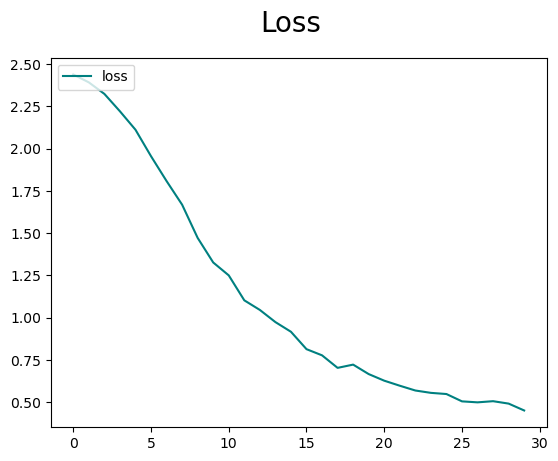

In [15]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal',label='loss')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

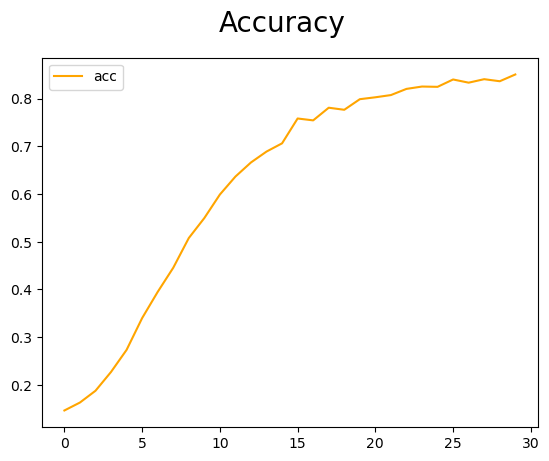

In [16]:
#Visualizing loss:
fig = plt.figure()
plt.plot(history.history['acc'], color='orange',label='acc')
#plt.plot(history.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
test_image = image.load_img('C:/Users/tyler/projects/Bone-Fracture-Classifier/Images/Avulsion fracture/Avulsion fracture/1-s2.0-S0899707114002836-gr2.jpg', target_size = (200,200))

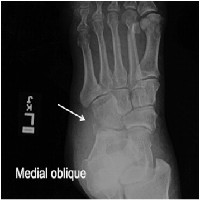

In [22]:
test_image

In [23]:
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

1/1 [==============================] - 1s 641ms/step


In [24]:
result

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
if result[0][0] == 1:
    print("Avulsion Fracture")
elif result[0][1] == 1:
    print("Comminuted fracture")
elif result[0][2] == 1:
    print("Compression-Crush fracture")
elif result[0][3] == 1:
    print("Fracture Dislocation")
elif result[0][4] == 1:
    print("Greenstick fracture")
elif result[0][5] == 1:
    print("Hairline fracture")
elif result[0][6] == 1:
    print("Impacted Dislocation")
elif result[0][7] == 1:
    print("Intra-articluar fracture")
elif result[0][8] == 1:
    print("Longitudinal fracture")
elif result[0][9] == 1:
    print("Oblique Dislocation")
elif result[0][10] == 1:
    print("Pathological fracture")
elif result[0][11] == 1:
    print("Spiral fracture")
else:
    print("Unknown")

Avulsion Fracture
